<h1> <center> <span>An Analysis on Stroke Data</span>

![Stroke Image](https://i.imgur.com/xbn3JEW.png)

### <span>Installing the required Libraries</span>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

-----

### <span>Loading and Cleaning the Dataset</span>

In [2]:
# Loading the Dataset and Converting it into a Pandas DataFrame

# Dataset Source - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download
df = pd.read_csv('stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Inital details of the dataset

# Checking the total number of rows and columns in the df
print("The initial shape of the column is:",df.shape,"\n")

# Checking the datatypes of the columns
print("The datatypes of the columns are as follows:\n\n",df.dtypes,"\n")

# Checking for missing values
print("Checking for missing values in the df:\n\n",df.isnull().sum())

The initial shape of the column is: (5110, 12) 

The datatypes of the columns are as follows:

 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object 

Checking for missing values in the df:

 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


BMI is calculated based on the height and weight of an individual. In this case, since the dataset does not feature these columns and since we have ample data, we decided to remove/drop the null values rather than replace the missing values in the BMI field.

In [4]:
# Cleaning the Dataset

# Dropping null values from the df
df = df.dropna(axis=0) 

# Dropping unwanted columns
df = df.drop('id', axis=1)

# Dropping unwanted rows
# Dropping the 'Other' category from the 'Gender' column as there is only 1 instance of it and is considered an outlier
df = df.drop(df[df['gender'] == 'Other'].index)

# Resetting the index to ensure that the index values are continuous and consistent
df = df.reset_index(drop=True) # drop = True -> drops the old index column

# df

In [5]:
# Checking the df after cleaning
df.shape

(4908, 11)

----------

### <span>Analysis</span>

1. Respondents Profile
2. Descriptive Analysis of the Data
3. Data Analysis   
a. Age, BMI, and AGL Correlation Matrix  
b. Comparing Stroke with Hypertension, Heart Disease, and Smoking  
c. Comparing Age with BMI and AGL in Stroke Patients based on Gender  
d. Comparing Glucose and BMI for Stroke, Heart Disease, and Hypertension  

#### <span>1. Respondents Profile</span>

In [6]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


---------

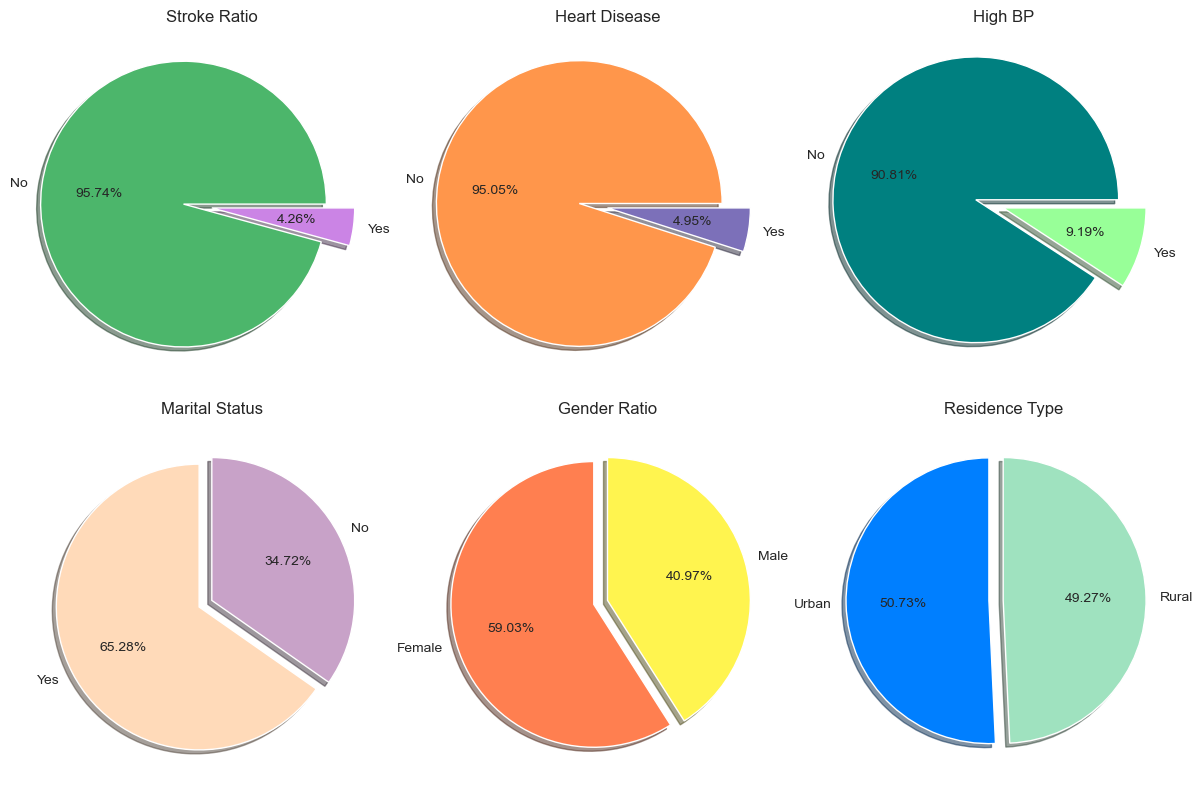

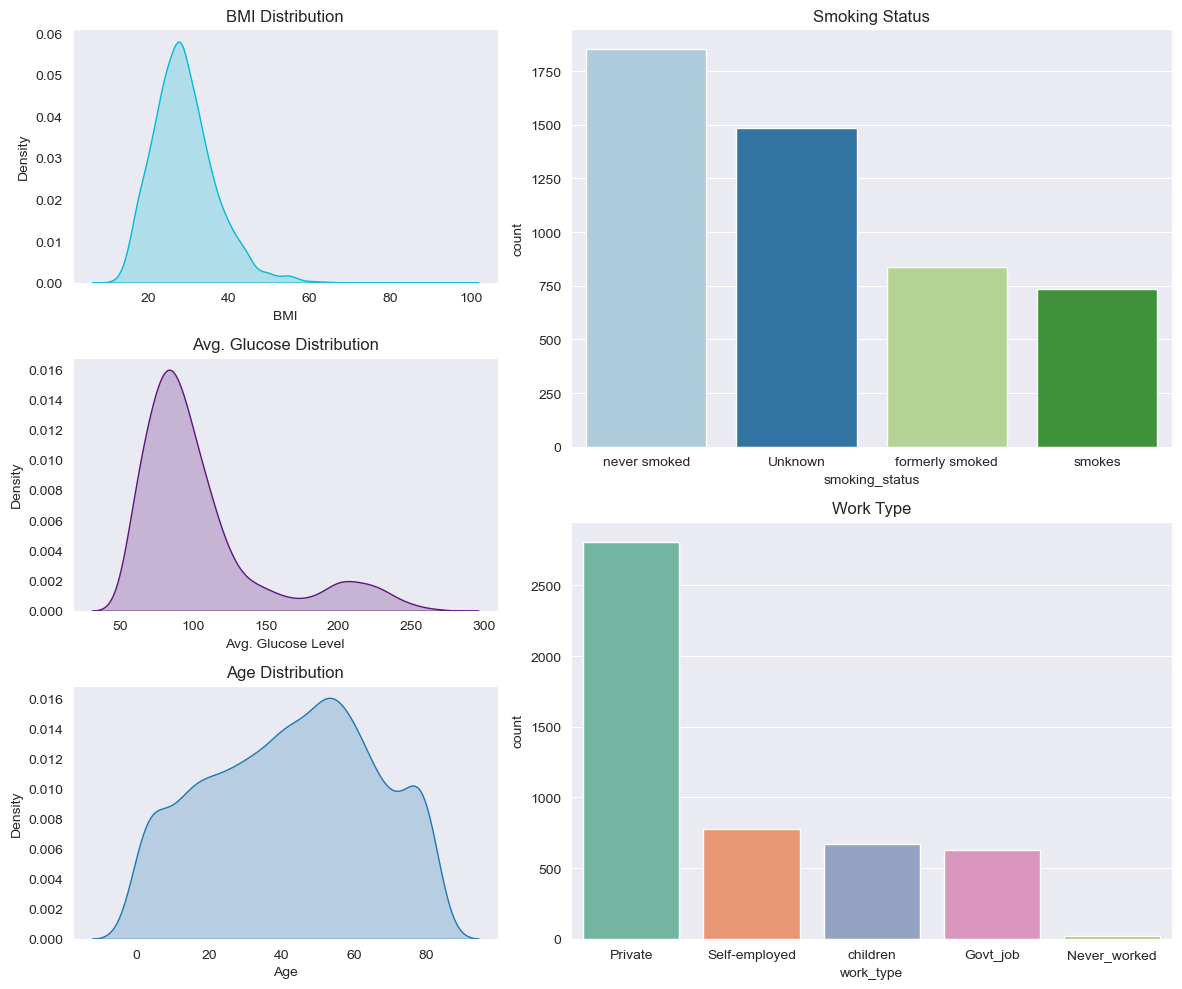

In [28]:
# Plot 1/2

fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 1], width_ratios=[1, 1, 1])

# Adding subplots to the GridSpec object
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])


# Plot the data
# 1. Stroke Ratio
stroke_ratio = df.stroke.value_counts()
explode = (0.2, 0)
colors = ['#4cb66b', '#cb84e5']

ax1.set_title('Stroke Ratio')
ax1.axis('equal')
ax1.pie(stroke_ratio, labels=['No', 'Yes'], autopct='%1.2f%%',
               explode=explode, startangle=0, shadow=True, colors=colors)

# 2. Heart Disease
hd = df.heart_disease.value_counts()
explode = (0.2, 0)
colors = ['#ff964b', '#7c70b9']

ax2.set_title('Heart Disease')
ax2.axis('equal')
ax2.pie(hd, labels=['No', 'Yes'], autopct='%1.2f%%',
               explode=explode, startangle=0, shadow=True, colors=colors)

# 3. Hypertension
ht = df.hypertension.value_counts()
explode = (0.2, 0)
colors = ['#008080', '#98ff98']

ax3.set_title('High BP')
ax3.axis('equal')
ax3.pie(ht, labels=['No', 'Yes'], autopct='%1.2f%%',
               explode=explode, startangle=0, shadow=True, colors=colors)

# 4. Marital Status
em = df.ever_married.value_counts()
explode = (0.1, 0)
colors = ['#ffdab9', '#c8a2c8']

ax4.set_title('Marital Status')
ax4.axis('equal')
ax4.pie(em, labels=em.index, autopct='%1.2f%%',
               explode=explode, startangle=90, shadow=True, colors=colors)

# 5. Gender Ratio
gender = df.gender.value_counts()
explode = (0.1, 0)
colors = ['#ff7f50', '#fff44f']

ax5.set_title('Gender Ratio')
ax5.axis('equal')
ax5.pie(gender, labels=gender.index, autopct='%1.2f%%',
               explode=explode, startangle=90, shadow=True, colors=colors)

# 6. Residence Type
rt = df.Residence_type.value_counts()
explode = (0.1, 0)
colors = ['#007fff', '#9fe2bf']

ax6.set_title('Residence Type')
ax6.axis('equal')
ax6.pie(rt, labels=rt.index, autopct='%1.2f%%',
               explode=explode, startangle=90, shadow=True, colors=colors)


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Plot 2/2 -----------------------------------------------------------------------------------

fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(6, 4, height_ratios=[1, 1, 1, 1, 1, 1], width_ratios=[1, 1, 1.5, 1.5])

# Add subplots to the GridSpec object
ax7 = fig.add_subplot(gs[0:2, 0:2])
ax8 = fig.add_subplot(gs[2:4, 0:2])
ax9 = fig.add_subplot(gs[4:6, 0:2])
ax10 = fig.add_subplot(gs[0:3, 2:4])
ax11 = fig.add_subplot(gs[3:6, 2:4])


# 7. BMI Distribution
sns.kdeplot(data=df, x='bmi', fill=True, color='#00BCD4', ax=ax7)
ax7.set_title('BMI Distribution')
ax7.set_xlabel('BMI')
ax7.set_ylabel('Density')
ax7.grid(False)

# 8. Average Glucose Level Distribution
sns.kdeplot(data=df, x='avg_glucose_level', fill=True, color='#5c157e', ax=ax8)
ax8.set_title('Avg. Glucose Distribution')
ax8.set_xlabel('Avg. Glucose Level')
ax8.set_ylabel('Density')
ax8.grid(False)

# 9. Age Distribution
sns.kdeplot(data=df, x='age', fill=True, ax=ax9)
ax9.set_title('Age Distribution')
ax9.set_xlabel('Age')
ax9.set_ylabel('Density')
ax9.grid(False)

# 10. Smoking Status
ax10.set_title('Smoking Status')
sns.countplot(x='smoking_status', data=df,
              order=['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
              palette='Paired', ax=ax10)

# 11. Work Type
ax11.set_title('Work Type')
sns.countplot(x='work_type', palette='Set2', data=df,
              order=['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], ax=ax11);


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### <span style='background-color:	#ff7f50'>Insights</span>


The sample size for all the below categories is 4908.

***Diseases:***

`1. Stroke -` The total percentage of people suffering from stroke out of the entire sample size is just 4.26% or about 209 people in 4908. 

`2. Heart Disease -` As like with people suffering from stroke the % of people suffering from any heart diseases is about 4.95%, just slightly higher than stroke.

`3. Hypertension / High BP -`  Compared to the first 2 diseases the number of people suffering from hypertension is relatively higher as the % of people suffering from hypertension is 9.19% which is roughly about 1 in 10 individuals. 


***Personal Factors:***

`4. Marital Status -` Around 35% or roughly 1 in 3 people in the sample size is married. 

`5. Gender -` Females represent a majority in the data as they account for nearly 60% of the people as compared to around 40% of men.

`6. Residence Type -` The number of people living in rural or urban areas is about the same as they are both around 50%.


***Health Indicators:***

`7. BMI -` BMI indicates whether a given individual is obese. According to "nhs.uk",   
a. BMI "less than 18.5" is described as underweight.   
b. BMI between "18.5 - 24.9" is described as healthy.   
c. BMI between "25 - 29.9" is described as overweight.   
d. BMI between "30 - 39.9" is described as obese.  
e. BMI "more than 40" is described as severely obese.   

The majority of the people in the sample size are in the healthy range. 

`8. Average Glucose Level (AGL)-` Average Glucose Levels indicate whether a given individual is diabetic. According to "mayoclinic.org",  
a.  AGL "less than 100 mg/dL" is normal.   
b. AGL from 100 - 125 mg/dL is considered prediabetes.   
c. AGL "more than 126 mg/dL" on two separate tests is considered diabetes.

The average glucose levels (AGL) for most of the indiduals in the sample size is below 100 mg/dL which is normal. 

`9. Age -` People are more prone to diseases as they age. The average age in the sample size seems to be around in the range of 40 to 60.  


***Additional Factors:***

`10. Smoking -` Most of the people in the sample size are non-smokers. And nearly an equal number of those people either smoke or formerly smoked. 

`11. Work Type -` People who work for the government, self-employed people, and children combined make up the same number of people as those people working for private companies.

------

#### <span>2. Descriptive Analysis of the Data</span>

In [8]:
df_desc = df.describe()
df_desc

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


#### <span style='background-color:	#ff7f50'>Insights</span>

From the above table, we can infer the following: 

1. The average age of the sample size is 42.8 years. This means that the majority of the people are middle-aged adults. The standard deviation for age is 22.5 years. This suggests that there is a wide range of ages in the data set, from young adults to older adults.
2. About 9% of the sample size has hypertension. This is a relatively high percentage when compared to heart disease and stroke. This also suggests hypertension is a potential risk factor for both heart disease and stroke.
3. About 5% of the sample size has heart disease. This is a relatively low percentage when compared to hypertension.
4. The AGL is 105.3 mg/dL. This suggests that a majority of the people are non-diabetic. The standard deviation for glucose level is 44.4 mg/dL. This suggests that the AGL among individuals can vary quite a bit.
5. About 4% of the people had a stroke. This is also a relatively low percentage, but it still suggests that stroke is a serious risk for some people.

---------

#### <span>3. Data Analysis</span>

#### <span>a. Age, BMI, and AGL Correlation Matrix</span>

**Selecting the columns necessary for correlation**

In [9]:
# For simplicity we name the df as -> df2
df2 = df[['age','avg_glucose_level','bmi']]
df2.shape

(4908, 3)

**Calculating Skewness to confirm the distribution of the data**

In [10]:
# from scipy.stats import skew

# Calculate the skewness 
skewness = skew(df2)

# Print the result
print("Skewness:", skewness)

Skewness: [-0.11941324  1.61412545  1.05474047]


Based on the skewness values and the charts generated in Respondent's Profile for `Age, Avg Glucose Level and BMI` we can infer that:

`1. Age:` Skewness of -0.11941324. The distribution is slightly left-skewed, but the skewness is close to 0, indicating a nearly symmetric distribution.  
`2. Avg Glucose Level (AGL):` Skewness of 1.61412545. The distribution is moderately right-skewed, suggesting a longer right tail and a concentration of values on the left side.  
`3. BMI:` Skewness of 1.05474047. The distribution is moderately right-skewed, similar to the second variable.  

In summary, the second and third variables have noticeable right-skewness, indicating that their distributions are skewed towards higher values. The first variable is nearly symmetric, although it has a slight left-skewness. 

***Based on these findings it is preferred to go with Spearman Rank Correlation Coefficient as it does not assume any specific distribution of the variables and is suitable when the relationship is not necessarily linear or the data is not normally distributed***

In Spearman's rank correlation coefficient, the strength of the correlation can be interpreted as follows:

`0.1 to 0.3:` Weak correlation. The variables have a weak and possibly non-linear relationship.  
`0.3 to 0.5:` Moderate correlation. The variables have a moderate and possibly non-linear relationship.  
`0.5 to 0.7:` Strong correlation. The variables have a strong and possibly non-linear relationship.  
`0.7 to 1.0:` Very strong correlation. The variables have a very strong and possibly non-linear relationship.

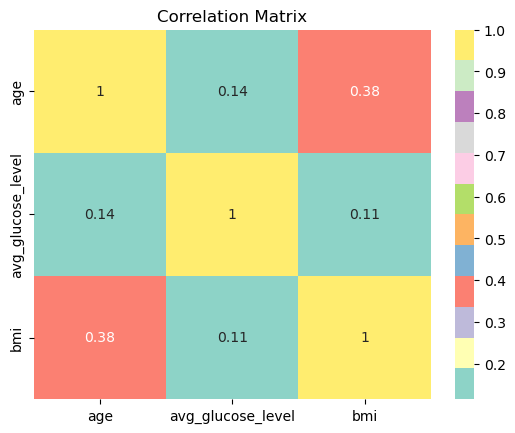

In [11]:
# Load the df required for correlation - We are gonna name this df -> df_corr 
df_corr = df[['age','avg_glucose_level','bmi']]

# Compute the correlation matrix
correlation_matrix = df_corr.corr(method='spearman') # by default the method is pearson

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Set3')

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

#### <span style='background-color:	#ff7f50'>Insights</span>

From the above correlation matrix for Age, BMI, and Average Glucose Level (AGL) we can infer the following:

`1. Age and BMI:` The correlation coefficient of 0.38 indicates that there is a moderately positive correlation between age and BMI. This means that as age increases, BMI also tends to increase. However, the correlation is not very strong, so it is not possible to say with certainty that there is a causal relationship between age and BMI.

`2. Age and AGL:` The correlation coefficient of 0.14 indicates that there is a weak positive correlation between age and AGL. This means that as age increases, the average glucose level also tends to increase. However, the correlation is not very strong, so it is not possible to say with certainty that there is a causal relationship between age and AGL.

`3. BMI and AGL:` The correlation coefficient of 0.11 indicates that there is a weak positive correlation between BMI and Average Glucose Level. This means that as BMI increases, AGL also tends to increase. However, the correlation is not very strong, so it is not possible to say with certainty that there is a causal relationship between BMI and AGL.

**Note** - The above conclusions are 95% accurate as the significance level for the above matrix is set to 0.05 by default.


**Further Insights -**

The causality of the above correlation co-effiecients cannot be determined as none of them satisfy the two conditions for causality i.e.,

`1. Significant Correlation -` There must be a significant correlation between the 2 variables.

`2. One of the below 2 conditions must be satisfied -` 

`a. Temporal precedence -` The cause must precede the effect in time. This means that changes in the cause variable should occur before changes in the effect variable. For example, let's consider the variables BMI and Average Glucose Level, there is no precedence as to which variable's data should be collected first. 

`b. Profound Theory -` There must be a theoretically founded and plausible theory which indicates in which direction the causal relationship goes. 


-------

#### <span>b. Comparing Stroke with Hypertension, Heart Disease, and Smoking</span>

**Seperating the original df to change the dtypes of a few variables** 

In [12]:
# Creating a new df based on the copy of the original df
df2 = df.copy()

# Changing the dtypes of "hypertension", "heart_disease" and "stroke"
df2['hypertension'] = df2['hypertension'].astype(str)
df2['hypertension'] = df2['hypertension'].replace({"0": "No High BP", "1": "High BP"})

df2['heart_disease'] = df2['heart_disease'].astype(str)
df2['heart_disease'] = df2['heart_disease'].replace({"0": "No Heart Disease", "1": "Heart Disease"})

df2['stroke'] = df2['stroke'].astype(str)
df2['stroke'] = df2['stroke'].replace({"0": "No Stroke", "1": "Stroke"})

# df2.head() 

# df2.dtypes

**Plotting the Graphs**

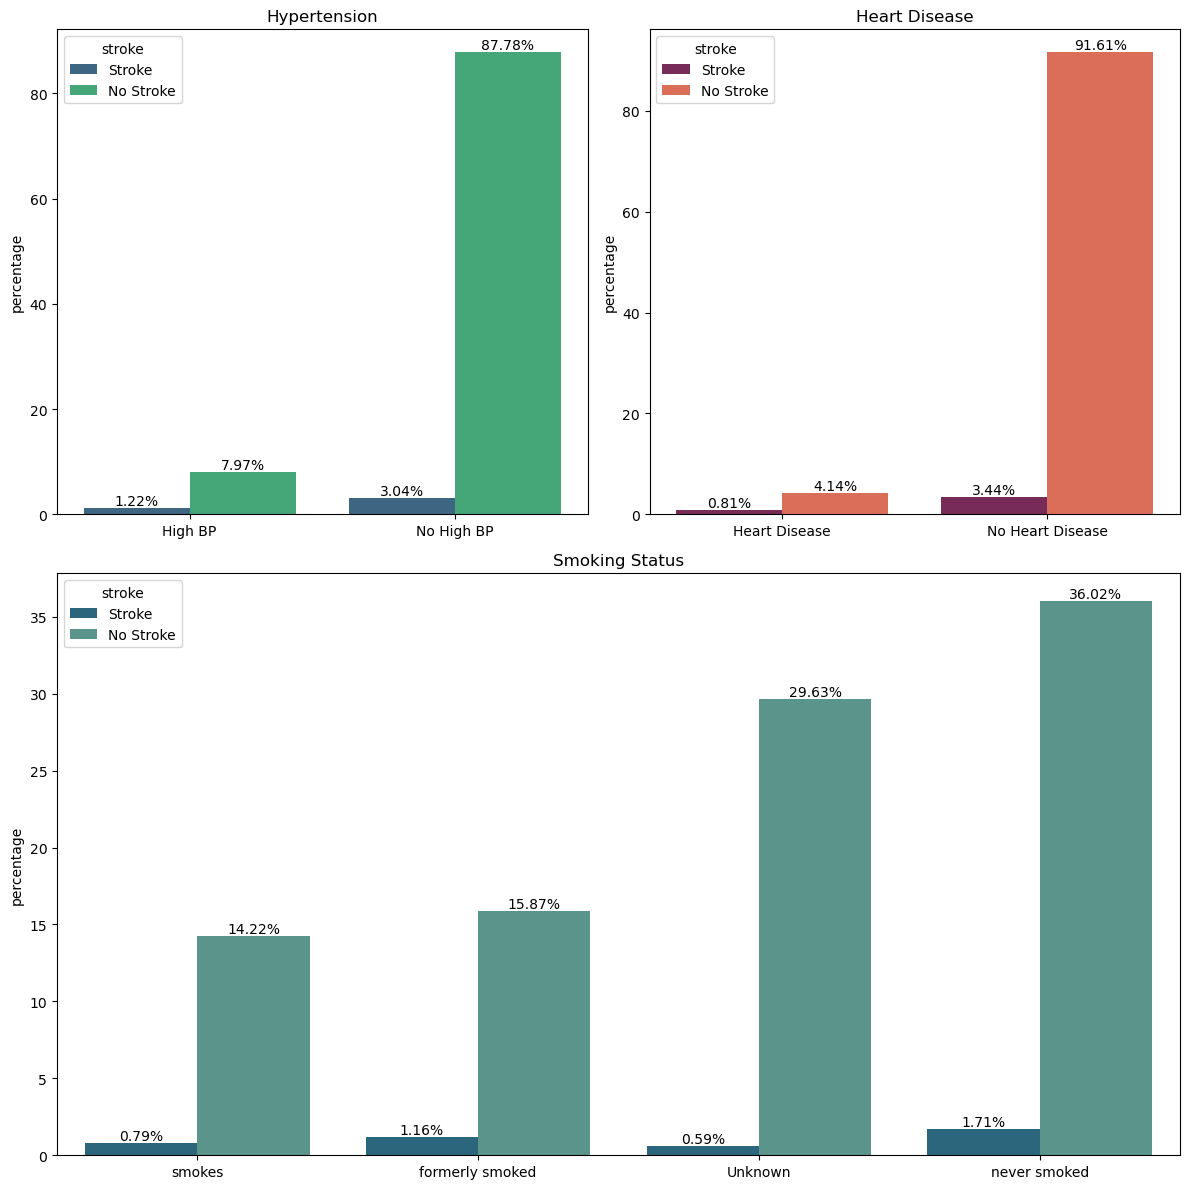

In [13]:
# Create a percentage column
df2['percentage'] = 1

# Compute the total count of all the data
total_count = len(df2)

# Define a custom function to compute the percentage
def percent(x):
    if len(x) == 0:
        return 0
    else:
        return 100 * x.sum() / total_count
    

# Create a figure with GridSpec layout
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1.2])


# Adding subplots to the GridSpec object
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])


# Plot 1 - Hypertension Vs Stroke
ax1.set_title('Hypertension')
sns.barplot(x='hypertension', y='percentage', hue='stroke', order=['High BP', 'No High BP'], data=df2, estimator=percent, palette='viridis', ax=ax1)
ax1.set_xlabel('')

# Plot 2 - Heart Disease Vs Stroke
ax2.set_title('Heart Disease')
sns.barplot(x='heart_disease', y='percentage', hue='stroke', order=['Heart Disease', 'No Heart Disease'], data=df2, estimator=percent, palette='rocket', ax=ax2)
ax2.set_xlabel('')

# Plot 3 - Smoking Status Vs Stroke
ax3.set_title('Smoking Status')
sns.barplot(x='smoking_status', y='percentage', hue='stroke', order=['smokes', 'formerly smoked', 'Unknown', 'never smoked'], data=df2, estimator=percent, palette='crest_r', ax=ax3)
ax3.set_xlabel('')

# Adding percentages for each bar
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#### <span style='background-color:	#ff7f50'>Insights</span>

From the above graphs, the following conclusions are drawn. 

`1. Hypertension -`
* The vast majority of people in the sample (87.78%) have no high blood pressure (BP) and no stroke. This suggests that high BP and stroke are relatively rare conditions.  
* A small percentage of people in the sample (3.04%) have no high BP but do have a stroke. This suggests that stroke can occur in people who do not have high BP, but it is much less common than stroke in people with high BP.  
* Another small percentage of people in the sample (7.97%) have high BP but no stroke. This suggests that high BP can be a risk factor for stroke, but it does not always lead to stroke.  
* A very small percentage of people in the sample (1.22%) have both high BP and stroke. This suggests that high BP and stroke are often co-occurring conditions, but they do not always occur together.  


`2. Heart Disease -`
* The vast majority of people in the sample (91.61%) have no heart disease and no stroke. This suggests that heart disease and stroke are relatively rare conditions.
* A small percentage of people in the sample (3.44%) have no heart disease but do have a stroke. This suggests that stroke can occur in people who do not have heart disease, but it is much less common than stroke in people with heart disease.
* Another small percentage of people in the sample (4.14%) have heart disease but no stroke. This suggests that heart disease can be a risk factor for stroke, but it does not always lead to stroke.
* A very small percentage of people in the sample (0.81%) have both heart disease and stroke. This suggests that heart disease and stroke are often co-occurring conditions, but they do not always occur together.


`3. Smoking Status -`
* The majority of the people in the sample size (36.02%) have never smoked and do not suffer from stroke. A small percentage (1.71%) of the non-smokers suffered from a stroke. 
* Around 15.87% of the people are former smokers and do not suffer from stroke, while 1.16% of the people are former smokers and suffer from stroke
* 14.22% of the people are smokers and do not suffer from stroke, while 0.79% of the people are former smokers and suffer from stroke


**Key Takeaways:**
* A great majority of the sample size (roughly greater than 90%) do not suffer from either hypertension, heart disease, or stroke. 
* Roughly 1 in 7 people who suffer from high BP are at risk for stroke. And roughly 1 in 5 people that suffer from heart disease is at risk for stroke.   
* Smoking including former smokers form only around 2% of stroke patients from the entire sample size. This strongly suggests that smoking might not lead to strokes. The odds of getting a stroke from smoking or from having previously smoked is around 1 in 15. This is relatively low when compared to hypertension and heart disease. 

------

#### <span >c. Comparing Age with BMI and AGL in Stroke Patients based on Gender</span>

**Creating data frames required for the analysis**

In [14]:
# Dropping the unwated columns for the previous analysis - "percentage"
df2 = df2.drop('percentage', axis=1)
# df2.shape

# stroke df
st_df = df2[(df2['stroke'] == "Stroke")]
# st_df.shape
# stroke df for male and female
st_df_m = st_df[(st_df['gender'] == 'Male')]
st_df_f = st_df[(st_df['gender'] == 'Female')]

# stroke df for urband and rural areas
st_df_ur = st_df[(st_df['Residence_type'] == 'Urban')]
st_df_ru = st_df[(st_df['Residence_type'] == 'Rural')]

**Plotting the Graphs**

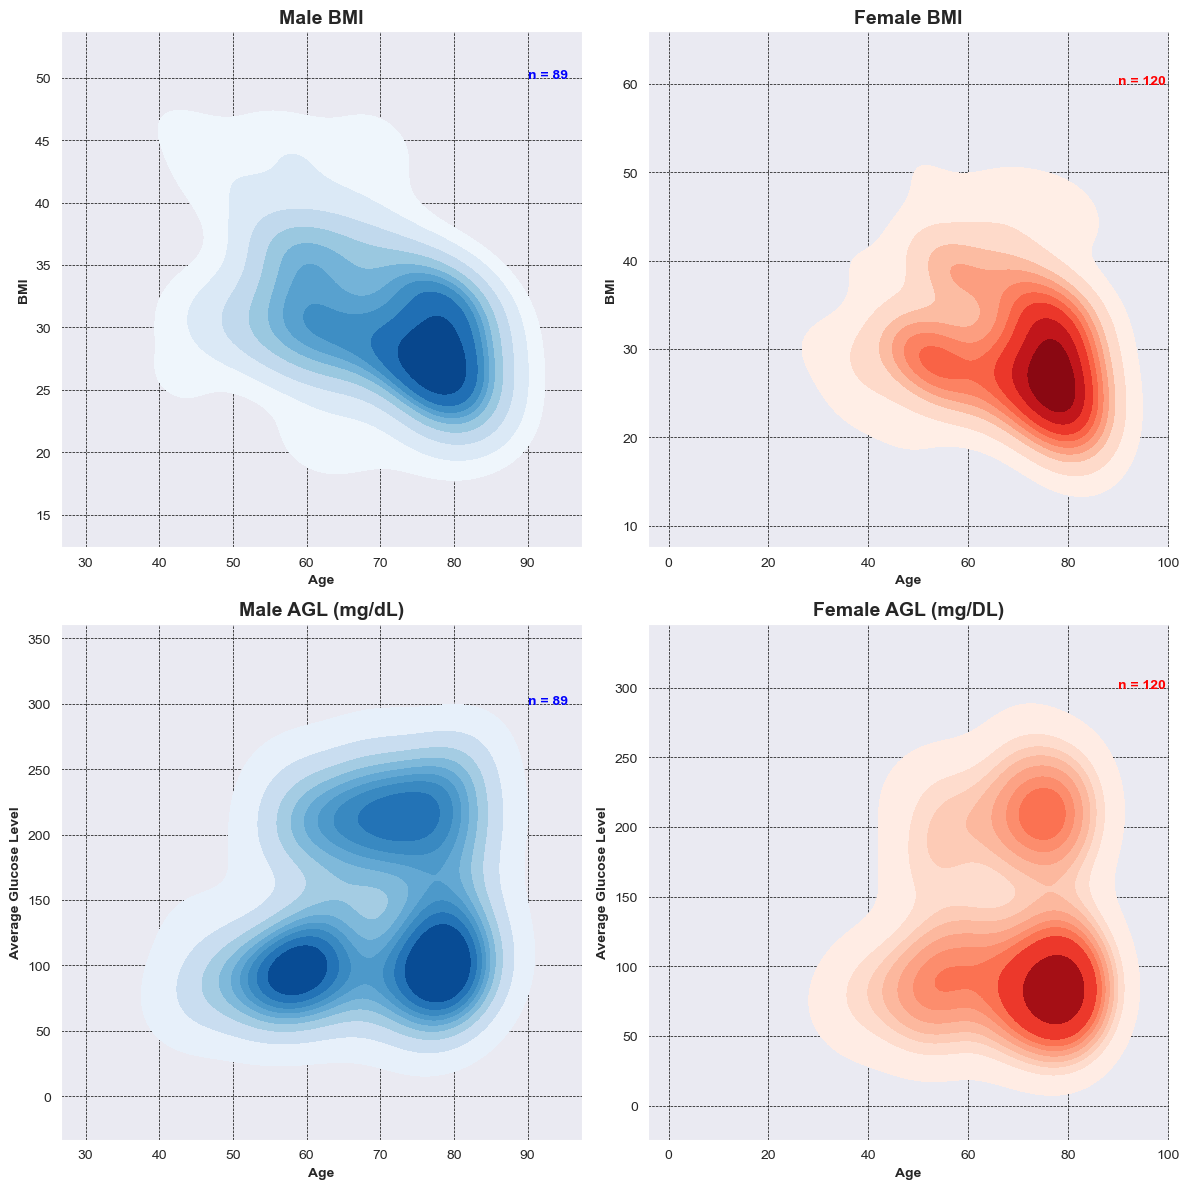

In [15]:
# Create the grid of subplots
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

sns.set_style('darkgrid')

# Add subplots to the GridSpec object
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Plot 1 - Male Stroke Patients BMI
# sns.jointplot(x='age', y='bmi', data=st_df_m, kind='kde', cmap='Blues', fill=True, thresh=0.05, ax=ax1)
sns.kdeplot(x='age', y='bmi', data=st_df_m, cmap='Blues', fill=True, thresh=0.05, ax=ax1)
ax1.set_title("Male BMI", fontsize=14, fontweight='bold')
ax1.set_xlabel('Age', fontweight='bold')
ax1.set_ylabel('BMI', fontweight='bold')
ax1.grid(True, linestyle='--', linewidth=0.5, color='black')

# Plot 2 - Female Stroke Patients BMI
sns.kdeplot(x='age', y='bmi', data=st_df_f, cmap='Reds', fill=True, thresh=0.05, ax=ax2)
ax2.set_title("Female BMI", fontsize=14, fontweight='bold')
ax2.set_xlabel('Age', fontweight='bold')
ax2.set_ylabel('BMI', fontweight='bold')
ax2.grid(True, linestyle='--', linewidth=0.5, color='black')

# Plot 3 - Male Stroke Patients AGL
sns.kdeplot(x='age', y='avg_glucose_level', data=st_df_m, cmap='Blues', fill=True, thresh=0.05, ax=ax3)
ax3.set_title("Male AGL (mg/dL)", fontsize=14, fontweight='bold')
ax3.set_xlabel('Age', fontweight='bold')
ax3.set_ylabel('Average Glucose Level', fontweight='bold')
ax3.grid(True, linestyle='--', linewidth=0.5, color='black')

# Plot 4 - Male Stroke Patients AGL
sns.kdeplot(x='age', y='avg_glucose_level', data=st_df_f, cmap='Reds', fill=True, thresh=0.05, ax=ax4)
ax4.set_title("Female AGL (mg/DL)", fontsize=14, fontweight='bold')
ax4.set_xlabel('Age', fontweight='bold')
ax4.set_ylabel('Average Glucose Level', fontweight='bold')
ax4.grid(True, linestyle='--', linewidth=0.5, color='black')



ax1.annotate(f"n = {len(st_df_m['bmi'])}", (90, 50), color='blue', fontsize=10, fontweight='bold')
ax2.annotate(f"n = {len(st_df_f['bmi'])}", (90, 60), color='red', fontsize=10, fontweight='bold')
ax3.annotate(f"n = {len(st_df_m['avg_glucose_level'])}", (90, 300), color='blue', fontsize=10, fontweight='bold')
ax4.annotate(f"n = {len(st_df_f['avg_glucose_level'])}", (90, 300), color='red', fontsize=10, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### <span style='background-color:	#ff7f50'>Insights</span>

`1.BMI -` 
From the given graphs, we can see that most stroke patients of both genders have a BMI greater than 25, indicating that they are overweight or obese. This suggests that stroke is prevalent among higher BMI individuals regardless of gender. Also, a majority of stroke patients are above 70 in both genders. This shows that there is a significant correlation between BMI and stroke.

`2.AGL -`
The AGL for a majority of stroke patients seems to be below 125 mg/dl regardless of gender. This indicates that a majority of stroke patients are non-diabetic in nature. Also, AGL seems to increase with age for a small percentage of people. On the other hand, the likelihood of stroke is high amongst males between the ages of 55 and 75. Amongst female stroke patients this is around the age of 70 and greater. This suggests that there is a weak correlation between AGL and stroke. 

**Key Takeaways:**

* The prevalence of stroke in females is slightly higher as compared to males with over 55% of the stroke cases being observed in females.
* Higher BMI can increase the risk of stroke in both males and females, as various studies suggest that excess body weight is associated with several diseases such as hypertension, diabetes, and cardiovascular disease. Also, BMI does not tend to increase with age. 
* Most stroke patients are non-diabetic in both genders. This indicates that AGL does not play a significant role in stroke patients. Also, AGL tends to increase with age for a small percentage of people.
* From all 4 graphs, we can conclude that age plays a significant role in stroke patients. Age is more prevalent in people aged above 60 and the likelihood of stroke increases with age.  

---------

#### <span>d. Comparing Glucose and BMI for Stroke, Heart Disease, and Hypertension</span>

**Creating data frames required for the analysis**

In [16]:
# Hypertension df
ht_df = df2[(df2['hypertension'] == "High BP")]

# Heart Disease df
hd_df = df2[(df2['heart_disease'] == "Heart Disease")]

**Plotting the Graphs**

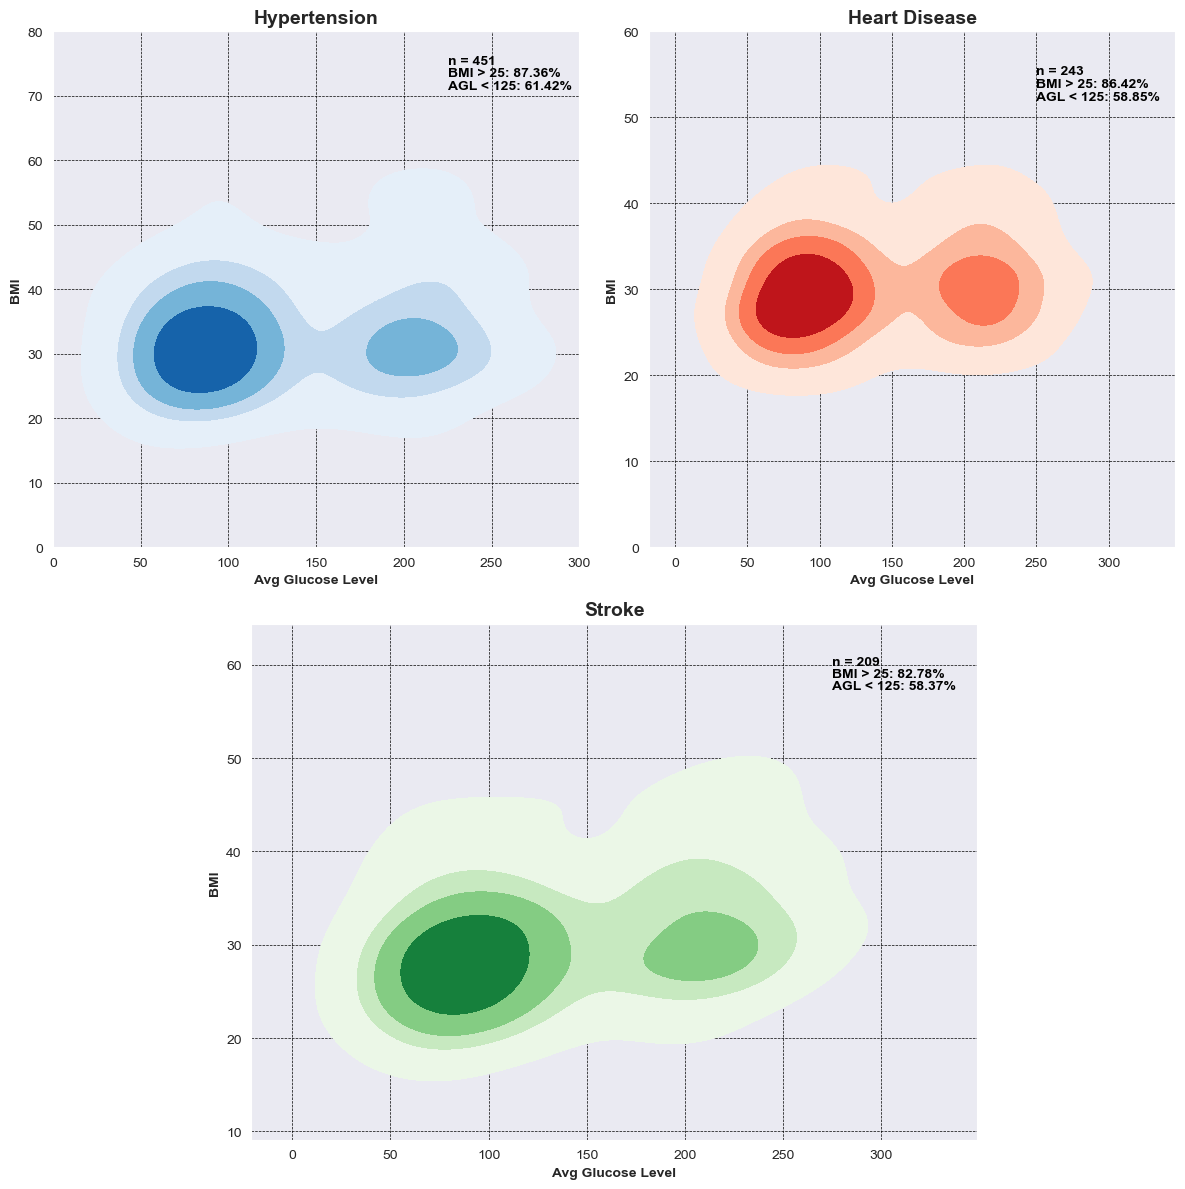

In [17]:
# Create the grid of subplots
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1], width_ratios=[1, 1, 1, 1, 1, 1])

# Set the style
sns.set_style('darkgrid') # Note - If this code is moved down, we need to run the cell twice for this code to take effect. 

# Add subplots to the GridSpec object
ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:6])
ax3 = fig.add_subplot(gs[1, 1:5])


# Plot 1 - Hypertension 
sns.kdeplot(x='avg_glucose_level', y='bmi', data=ht_df, cmap='Blues', fill=True, thresh=0.05, levels=5, ax=ax1)
ax1.set_title("Hypertension", fontsize=14, fontweight='bold')
ax1.set_xlabel('Avg Glucose Level', fontweight='bold')
ax1.set_ylabel('BMI', fontweight='bold')
ax1.set_xlim(0, 300)
ax1.set_ylim(0, 80)
ax1.grid(True, linestyle='--', linewidth=0.5, color='black')


# Plot 2 - Heart Disease 
sns.kdeplot(x='avg_glucose_level', y='bmi', data=hd_df, cmap='Reds', fill=True, thresh=0.05, levels=5, ax=ax2)
ax2.set_title("Heart Disease", fontsize=14, fontweight='bold')
ax2.set_xlabel('Avg Glucose Level', fontweight='bold')
ax2.set_ylabel('BMI', fontweight='bold')
ax2.set_ylim(0, 60)
ax2.grid(True, linestyle='--', linewidth=0.5, color='black')

# Plot 3 - Stroke
sns.kdeplot(x='avg_glucose_level', y='bmi', data=st_df, cmap='Greens', fill=True, thresh=0.05, levels=5, ax=ax3)
ax3.set_title("Stroke", fontsize=14, fontweight='bold')
ax3.set_xlabel('Avg Glucose Level', fontweight='bold')
ax3.set_ylabel('BMI', fontweight='bold')
ax3.grid(True, linestyle='--', linewidth=0.5, color='black')


# printing the sample size (n) on graph
ax1.annotate(f"n = {len(ht_df)}", (225, 75), color='black', fontsize=10, fontweight='bold')
ax2.annotate(f"n = {len(hd_df)}", (250, 55), color='black', fontsize=10, fontweight='bold')
ax3.annotate(f"n = {len(st_df)}", (275, 60), color='black', fontsize=10, fontweight='bold')

# Printing the bmi > 25 % 
ax1.annotate(f"BMI > 25: {round(100 * len(ht_df[(ht_df['bmi'] >= 25)])/len(ht_df), 2)}%", (225, 73), color='black', fontsize=10, fontweight='bold')
ax2.annotate(f"BMI > 25: {round(100 * len(hd_df[(hd_df['bmi'] >= 25)])/len(hd_df), 2)}%", (250, 53.5), color='black', fontsize=10, fontweight='bold')
ax3.annotate(f"BMI > 25: {round(100 * len(st_df[(st_df['bmi'] >= 25)])/len(st_df), 2)}%", (275, 58.7), color='black', fontsize=10, fontweight='bold')

# Printing the bmi > 25 % 
ax1.annotate(f"AGL < 125: {round(100 * len(ht_df[(ht_df['avg_glucose_level'] <= 125)])/len(ht_df), 2)}%", (225, 71), color='black', fontsize=10, fontweight='bold')
ax2.annotate(f"AGL < 125: {round(100 * len(hd_df[(hd_df['avg_glucose_level'] <= 125)])/len(hd_df), 2)}%", (250, 52), color='black', fontsize=10, fontweight='bold')
ax3.annotate(f"AGL < 125: {round(100 * len(st_df[(st_df['avg_glucose_level'] <= 125)])/len(st_df), 2)}%", (275, 57.4), color='black', fontsize=10, fontweight='bold')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### <span style='background-color:	#ff7f50'>Insights</span>

`1. Hypertension -`
The data shows that about 87.36% of the people who suffer from hypertension tend to have a BMI greater than 25. This indicates a significant association between BMI and hypertension. About 61.42% of the people suffering from hypertension have an AGL of 125 mg/dL Approximately 61.42% of individuals with hypertension exhibit an AGL of 125 mg/dL or below. This indicates that the remaining (38.58%) people have high AGL, indicating a moderate correlation with hypertension

`2. Heart Disease -` 
Around 86.42% of individuals with heart disease have a BMI greater than 25, indicating a strong association between heart disease and higher BMI values. The data also reveals that approximately 58.85% of individuals with heart disease have an AGL within 125 mg/dL, suggesting a substantial proportion of heart disease patients are within the target range for blood glucose levels. This indicates that the remaining (41.15%) people have high AGL, indicating a moderate correlation with heart disease just like in hypertenion.

`3. Stroke -` 
Approximately 82.78% of stroke patients have a BMI greater than 25, indicating a significant association between a higher BMI and the occurrence of stroke. Approximately 58.37% of stroke patients have an AGL within 125 mg/dL, indicating again a moderate correlation between stroke and heart disease.

**Key Takeaways:**
* In the entire sample size most people suffer from hypertension (451) as compared to heart diseases (243) or stroke (209). This indicates that hypertension is a bigger threat than heart disease or stroke.
* There is a significant association between higher BMI and hypertension, heart disease, and stroke.
* There is a moderate association between higher AGL and hypertension, heart disease, and stroke.